In [ ]:
!pip install impyute
!pip install fancyimpute
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
#To perform kFold Cross Validation
from sklearn.model_selection import StratifiedKFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import random

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix,roc_curve,precision_recall_curve

import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loads the 5 raw .arff files into a list
N=5
load_arff_raw_data = [arff.loadarff('/content/drive/MyDrive/data/' + str(i+1) + 'year.arff') for i in range(N)]

# Loads the 5 raw .arff files into pandas dataframes
dataframes = [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data]

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
for i in range(len(dataframes)):
    col = getattr(dataframes[i], 'class')
    dataframes[i]['class'] = col.astype(int)
        


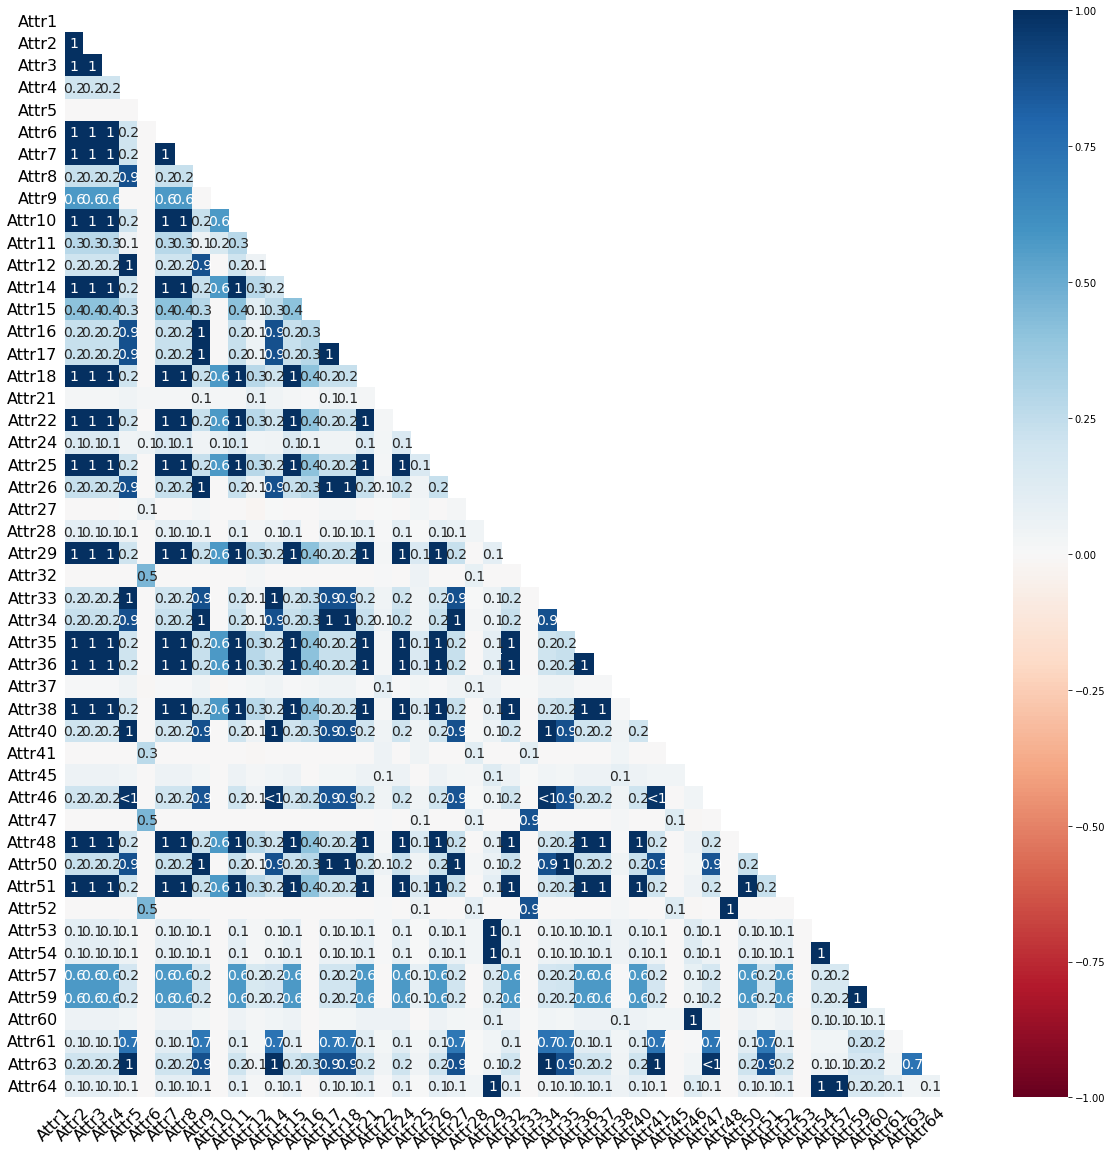

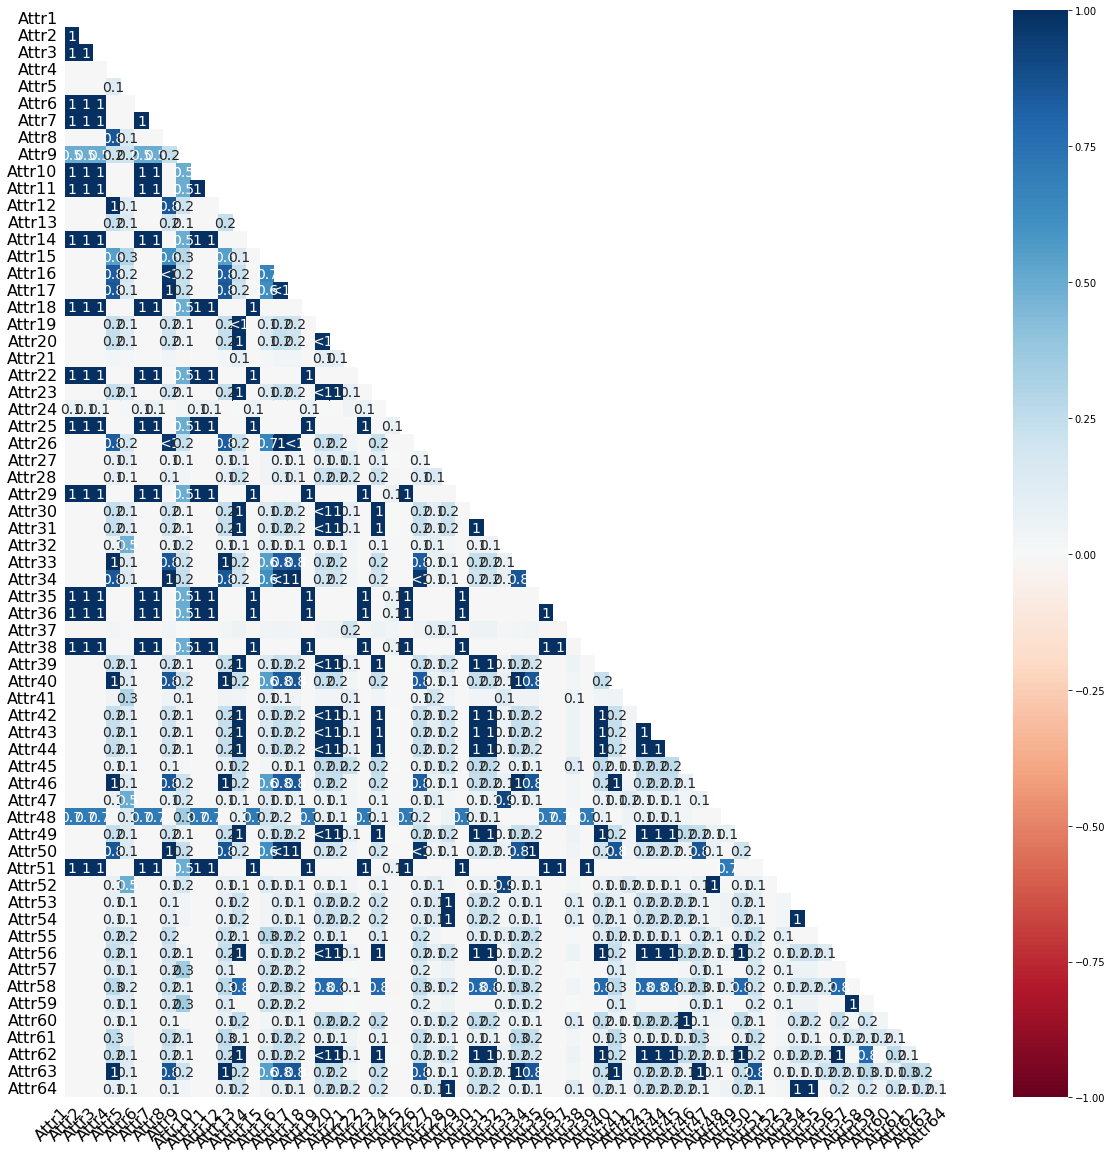

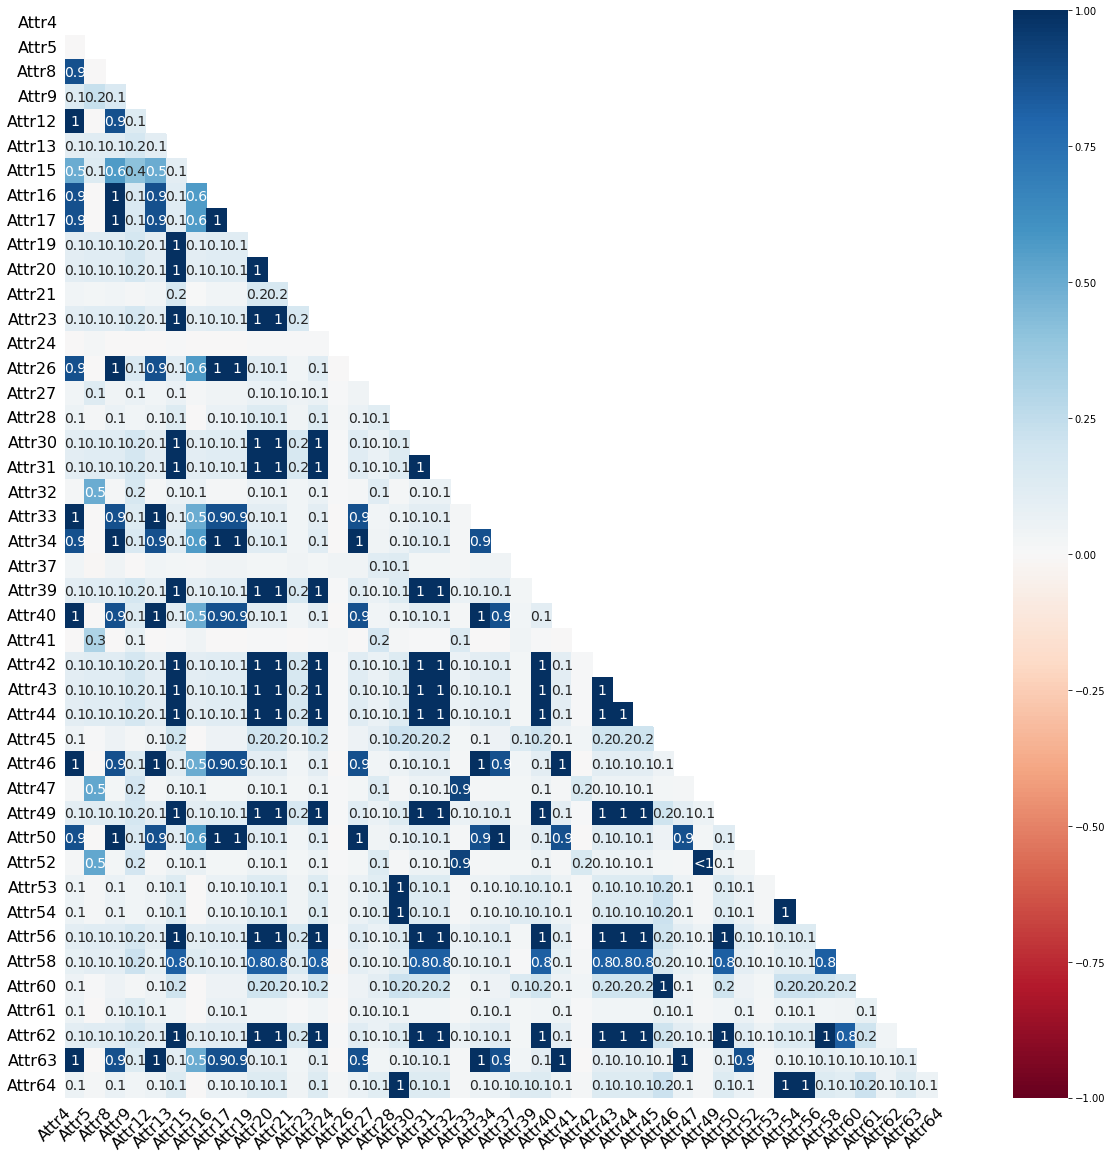

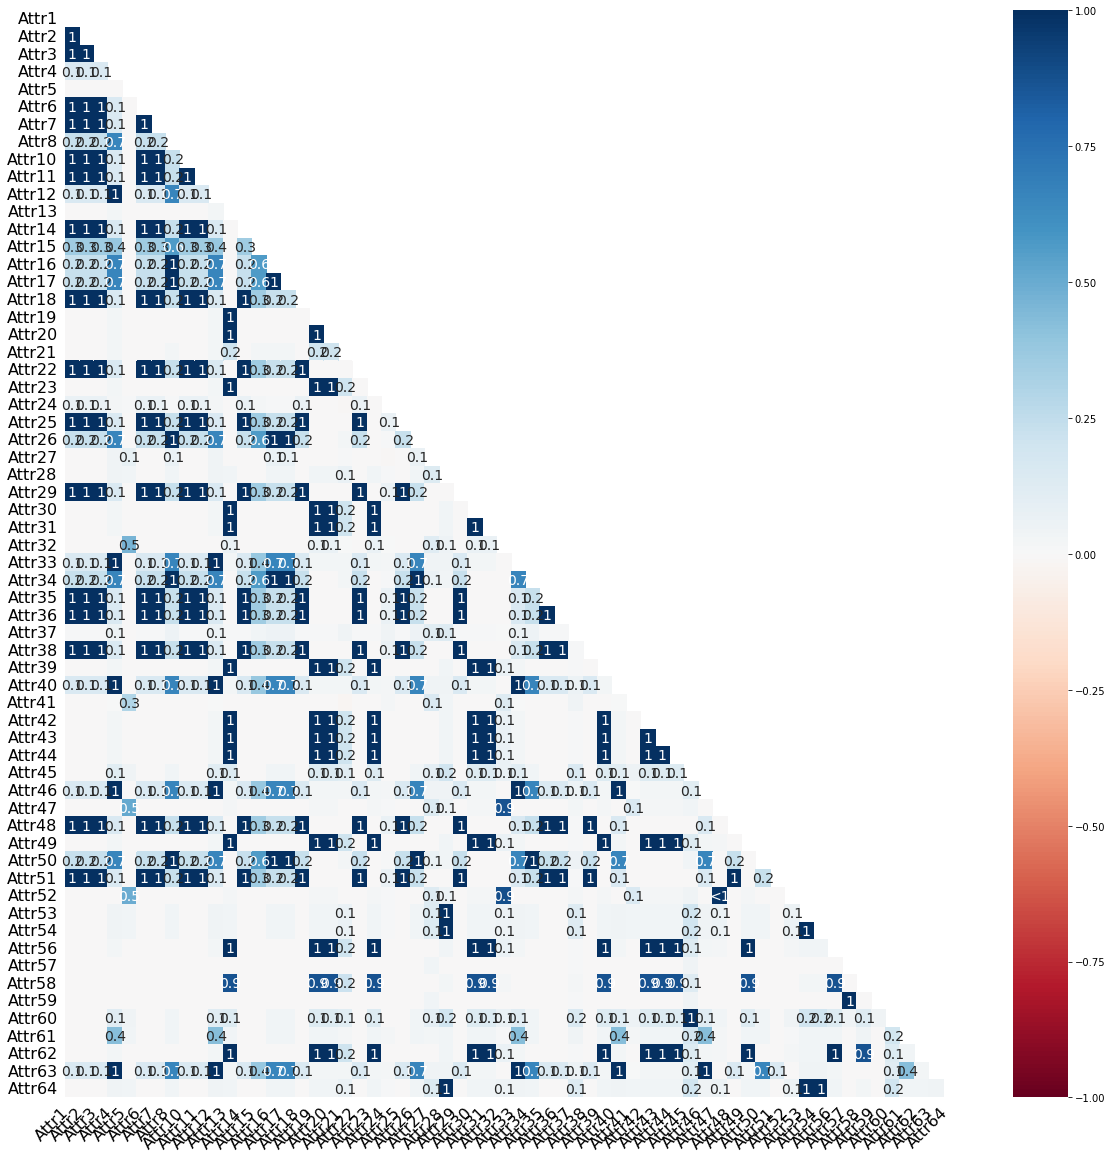

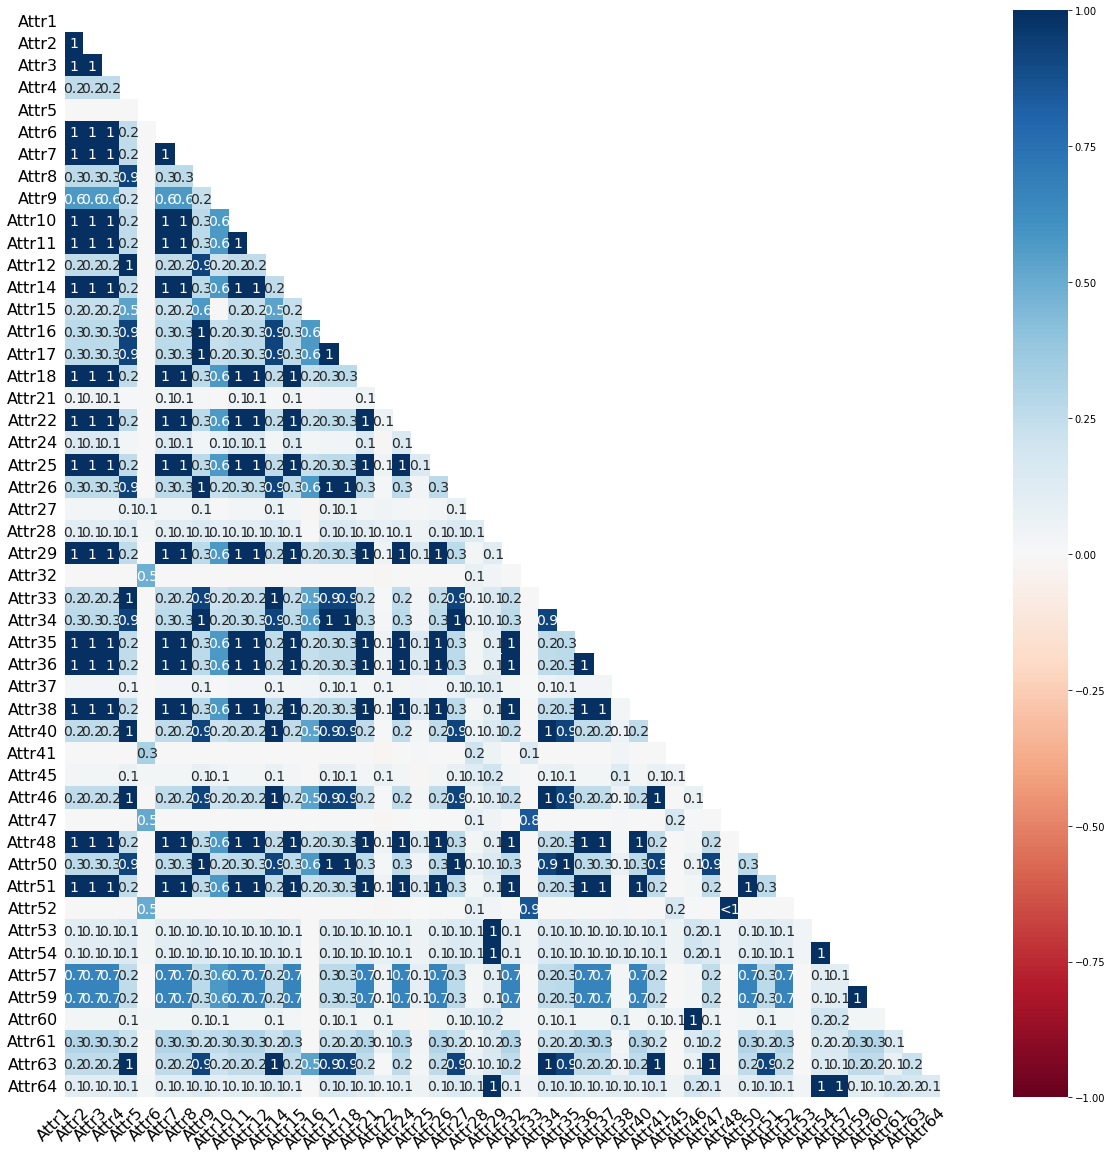

In [ ]:
# generate the heatmap for all the dataframes
def generate_heatmap(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i], figsize=(20,20))
        
generate_heatmap(dataframes)    

In [ ]:
# Construct an imputer with strategy as 'mean', to mean-impute along the columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputed_dataframes = [pd.DataFrame(imputer.fit_transform(df)) for df in dataframes]
for i in range(len(dataframes)):
    mean_imputed_dataframes[i].columns = dataframes[i].columns   



In [ ]:
knn_imputed_datasets = [fancyimpute.KNN(k=100,verbose=True).fit_transform(dataframes[i]) for i in range(len(dataframes))]
knn_imputed_dataframes = [pd.DataFrame(data=knn_imputed_datasets[i]) for i in range(len(dataframes))]
    


Imputing row 1/7027 with 0 missing, elapsed time: 24.158
Imputing row 101/7027 with 1 missing, elapsed time: 24.167
Imputing row 201/7027 with 2 missing, elapsed time: 24.176
Imputing row 301/7027 with 0 missing, elapsed time: 24.184
Imputing row 401/7027 with 0 missing, elapsed time: 24.190
Imputing row 501/7027 with 1 missing, elapsed time: 24.196
Imputing row 601/7027 with 1 missing, elapsed time: 24.202
Imputing row 701/7027 with 1 missing, elapsed time: 24.209
Imputing row 801/7027 with 0 missing, elapsed time: 24.215
Imputing row 901/7027 with 0 missing, elapsed time: 24.221
Imputing row 1001/7027 with 1 missing, elapsed time: 24.228
Imputing row 1101/7027 with 1 missing, elapsed time: 24.235
Imputing row 1201/7027 with 3 missing, elapsed time: 24.241
Imputing row 1301/7027 with 1 missing, elapsed time: 24.249
Imputing row 1401/7027 with 1 missing, elapsed time: 24.255
Imputing row 1501/7027 with 1 missing, elapsed time: 24.262
Imputing row 1601/7027 with 1 missing, elapsed time:

In [ ]:
for i in range(len(dataframes)):
    knn_imputed_dataframes[i].columns = dataframes[i].columns
    mean_imputed_dataframes[i].columns = dataframes[i].columns

In [ ]:
for i in range(len(knn_imputed_dataframes)):
  print(f"Dataframe  {i+1}")
  print("0 label :", len(knn_imputed_dataframes[i]) - knn_imputed_dataframes[i]['class'].sum())
  print("1 label :", knn_imputed_dataframes[i]['class'].sum())
  print(f"Proportion of 1s : {round(100*knn_imputed_dataframes[i]['class'].sum()/len(knn_imputed_dataframes[i]),2)} %")

Dataframe  1
0 label : 6756.0
1 label : 271.0
Proportion of 1s : 3.86 %
Dataframe  2
0 label : 9773.0
1 label : 400.0
Proportion of 1s : 3.93 %
Dataframe  3
0 label : 10008.0
1 label : 495.0
Proportion of 1s : 4.71 %
Dataframe  4
0 label : 9277.0
1 label : 515.0
Proportion of 1s : 5.26 %
Dataframe  5
0 label : 5500.0
1 label : 410.0
Proportion of 1s : 6.94 %


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0.0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0.0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0.0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0.0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1.0
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1.0
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1.0
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1.0


In [ ]:
knn_imputed_dataframes[0]['class']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7022    1.0
7023    1.0
7024    1.0
7025    1.0
7026    1.0
Name: class, Length: 7027, dtype: float64

In [ ]:

smote = SMOTE( random_state=42, k_neighbors=10)

oversampled_knn_df = []
oversampled_mean_df = []

for i in range(len(knn_imputed_dataframes)):
    
    temp_data1,y_knn = smote.fit_resample(knn_imputed_dataframes[i].iloc[:,:63],knn_imputed_dataframes[i]['class'])
    temp_data2,y_mean = smote.fit_resample(mean_imputed_dataframes[i].iloc[:,:63],mean_imputed_dataframes[i]['class'])

    temp_data1['class'] = y_knn
    temp_data2['class'] = y_mean

    oversampled_knn_df.append(temp_data1) 
    oversampled_mean_df.append(temp_data2) 



In [ ]:
def prepare_kfold_cv_data(k, X, y):
    X = X.values
    y = y.values
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in skf.split(X,y):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test


In [ ]:
# Logistic Regression classifier
lr_classifier = LogisticRegression(penalty = 'l2', random_state = 0)


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)


In [ ]:
# Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')


In [ ]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()


In [ ]:
models = {"Logistic Regression" : lr_classifier, "Decision Tree" : dt_classifier, "Gausian NB" : gnb_classifier, "RandomForest Classifier" : rf_classifier, "XGBoost Classifier" : xgb_classifier}

In [ ]:

k_folds = 3

dfs = {"Oversampled KNN": oversampled_knn_df, "Oversampled Mean" : oversampled_mean_df, "KNN Imputed Dataset" : knn_imputed_dataframes, "Mean Imputed Dataset" : mean_imputed_dataframes}
model_results = {}
dataset_results = {}
year_results = {}
all_results = pd.DataFrame()


for key,values in tqdm.tqdm(dfs.items()):
    for model_name,model in models.items():
        for i in range(len(values)):
            X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, values[i].iloc[:,:63], values[i]['class'])
            metrics_results = {}
            accuracy_list = []
            recall_list = []
            precision_list = []
            f1_score_list = []
            for k in range(k_folds):
                model.fit(X_train_list[k],y_train_list[k])

                y_test_predicted = model.predict(X_test_list[k])
                
                #code for calculating accuracy 
                _accuracy_ = accuracy_score(y_test_list[k], y_test_predicted, normalize=True)
                accuracy_list.append(_accuracy_)
                
                #code for calculating recall 
                _recalls_ = recall_score(y_test_list[k], y_test_predicted, average='binary')
                recall_list.append(_recalls_)
                
                #code for calculating precision 
                _precisions_ = precision_score(y_test_list[k], y_test_predicted, average='binary')
                precision_list.append(_precisions_)

                #code for calculating precision 
                _f1_score_ = f1_score(y_test_list[k], y_test_predicted, average='binary')
                f1_score_list.append(_f1_score_)
            
            # creating a metrics dictionary
            metrics_results['Accuracy'] = np.mean(accuracy_list)
            metrics_results['Precisions'] = np.mean(precision_list, axis=0)
            metrics_results['Recalls'] = np.mean(recall_list, axis=0)
            metrics_results['F1 Score'] = np.mean(f1_score_list, axis=0)
            tmp_list = [[key, model_name,i+1, metrics_results['Accuracy'],metrics_results['Precisions'],metrics_results['Recalls'],metrics_results['F1 Score']]]
            tmp_list = pd.DataFrame(tmp_list)
            all_results = pd.concat([all_results, tmp_list])
        
            
            year_results[str(i+1)+'year'] = metrics_results   
            
        model_results[model_name] = year_results
    dataset_results[key] = model_results
        
 
    


100%|██████████| 4/4 [05:17<00:00, 79.36s/it]


In [ ]:
for d_name,data_result in dataset_results.items():
    print("Dataset Name : ", d_name)
    for model_name,model_result in data_result.items():
        print("Model Name : ", model_name)
        for year,year_result in model_result.items():
            print("Year : ", year)
            for metric, metric_result in year_result.items():
                print(f"Metric : {metric} : {metric_result}")

Dataset Name :  Oversampled KNN
Model Name :  Logistic Regression
Year :  1year
Metric : Accuracy : 0.9790812346410668
Metric : Precisions : 0.934481594056062
Metric : Recalls : 0.49096459096459094
Metric : F1 Score : 0.6423431640822944
Year :  2year
Metric : Accuracy : 0.9681509879091713
Metric : Precisions : 0.7984867591424969
Metric : Recalls : 0.3699547375902443
Metric : F1 Score : 0.4800679992698065
Year :  3year
Metric : Accuracy : 0.9662953441873751
Metric : Precisions : 0.8509746588693957
Metric : Recalls : 0.3494949494949495
Metric : F1 Score : 0.4825012564427667
Year :  4year
Metric : Accuracy : 0.9607843137254902
Metric : Precisions : 0.8069637624717184
Metric : Recalls : 0.3492338727956843
Metric : F1 Score : 0.47483538131168973
Year :  5year
Metric : Accuracy : 0.9580372250423013
Metric : Precisions : 0.8682157711569477
Metric : Recalls : 0.4749892657793044
Metric : F1 Score : 0.5880765261570214
Model Name :  Decision Tree
Year :  1year
Metric : Accuracy : 0.97908123464106

In [ ]:
all_results.columns = ["Data", "Model","Year", "Accuracy", "Precision", "Recall","F1 Score"]


In [ ]:
all_results[all_results['Data'] == 'Oversampled KNN']

,Data,Model,Year,Accuracy,Precision,Recall,F1 Score
0,Oversampled KNN,Logistic Regression,1,0.593028,0.650805,0.407342,0.493878
0,Oversampled KNN,Logistic Regression,2,0.575463,0.642292,0.357613,0.452624
0,Oversampled KNN,Logistic Regression,3,0.560651,0.651423,0.266387,0.368947
0,Oversampled KNN,Logistic Regression,4,0.614961,0.639280,0.528939,0.576345
0,Oversampled KNN,Logistic Regression,5,0.677999,0.664182,0.721643,0.691290
0,Oversampled KNN,Decision Tree,1,0.898979,0.877731,0.927324,0.901781
0,Oversampled KNN,Decision Tree,2,0.886012,0.869349,0.909138,0.888660
0,Oversampled KNN,Decision Tree,3,0.878048,0.861317,0.901579,0.880828
0,Oversampled KNN,Decision Tree,4,0.878462,0.856878,0.909021,0.882070
0,Oversampled KNN,Decision Tree,5,0.897091,0.880658,0.919452,0.899402


In [ ]:
all_results[all_results['Data'] == 'Oversampled Mean']

,Data,Model,Year,Accuracy,Precision,Recall,F1 Score
0,Oversampled Mean,Logistic Regression,1,0.593028,0.650805,0.407342,0.493878
0,Oversampled Mean,Logistic Regression,2,0.575463,0.642292,0.357613,0.452624
0,Oversampled Mean,Logistic Regression,3,0.560651,0.651423,0.266387,0.368947
0,Oversampled Mean,Logistic Regression,4,0.614961,0.639280,0.528939,0.576345
0,Oversampled Mean,Logistic Regression,5,0.677999,0.664182,0.721643,0.691290
0,Oversampled Mean,Decision Tree,1,0.898979,0.877731,0.927324,0.901781
0,Oversampled Mean,Decision Tree,2,0.886012,0.869349,0.909138,0.888660
0,Oversampled Mean,Decision Tree,3,0.878048,0.861317,0.901579,0.880828
0,Oversampled Mean,Decision Tree,4,0.878462,0.856878,0.909021,0.882070
0,Oversampled Mean,Decision Tree,5,0.897091,0.880658,0.919452,0.899402


In [ ]:
all_results[all_results['Data'] == 'KNN Imputed Dataset']

,Data,Model,Year,Accuracy,Precision,Recall,F1 Score
0,KNN Imputed Dataset,Logistic Regression,1,0.959157,0.037037,0.003704,0.006734
0,KNN Imputed Dataset,Logistic Regression,2,0.955569,0.016260,0.004975,0.007619
0,KNN Imputed Dataset,Logistic Regression,3,0.950966,0.061111,0.004040,0.007576
0,KNN Imputed Dataset,Logistic Regression,4,0.944853,0.041667,0.003876,0.007092
0,KNN Imputed Dataset,Logistic Regression,5,0.924873,0.128094,0.014616,0.025955
0,KNN Imputed Dataset,Decision Tree,1,0.937526,0.285639,0.369353,0.316500
0,KNN Imputed Dataset,Decision Tree,2,0.919886,0.176803,0.267460,0.210618
0,KNN Imputed Dataset,Decision Tree,3,0.917167,0.201055,0.246465,0.220217
0,KNN Imputed Dataset,Decision Tree,4,0.912173,0.217164,0.267737,0.238555
0,KNN Imputed Dataset,Decision Tree,5,0.909306,0.360823,0.387738,0.372611


In [ ]:
all_results[all_results['Data'] == 'Mean Imputed Dataset']

,Data,Model,Year,Accuracy,Precision,Recall,F1 Score
0,Mean Imputed Dataset,Logistic Regression,1,0.959869,0.000000,0.000000,0.000000
0,Mean Imputed Dataset,Logistic Regression,2,0.956158,0.000000,0.000000,0.000000
0,Mean Imputed Dataset,Logistic Regression,3,0.950300,0.028986,0.004040,0.007092
0,Mean Imputed Dataset,Logistic Regression,4,0.945159,0.025641,0.001938,0.003604
0,Mean Imputed Dataset,Logistic Regression,5,0.925719,0.209984,0.021987,0.039546
0,Mean Imputed Dataset,Decision Tree,1,0.957165,0.458557,0.553724,0.500836
0,Mean Imputed Dataset,Decision Tree,2,0.944264,0.346868,0.450043,0.387312
0,Mean Imputed Dataset,Decision Tree,3,0.933448,0.344043,0.412121,0.369291
0,Mean Imputed Dataset,Decision Tree,4,0.928411,0.351702,0.409493,0.372556
0,Mean Imputed Dataset,Decision Tree,5,0.937902,0.547636,0.577537,0.553892
